In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Data collection and Analysis

In [3]:
# loading the data from csv file to a Pandas DataFrame
customer = pd.read_csv('Mall_Customers.csv')

In [4]:
# first 5 rows in the dataframe
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


CustomerID: Unique ID assigned to the customer.

Gender: Gender of the customer.

Age: Age of the customer.

Annual Income(k$): Annual Income of the customer.

Spending Score(1-100): Score assigned by the mall based on customer behavior and spending nature.

In [5]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# finding the number of rows and columns
customer.shape

(200, 5)

In [7]:
# getting some informations about the dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# checking for missing values
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#Renaming Columns Names 
customer.rename(columns ={"Annual Income (k$)": "Annual_Income","Spending Score (1-100)": "Spending_Score"},
            inplace=True)
customer.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

Exploratory Data Analysis

In [10]:
customer['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

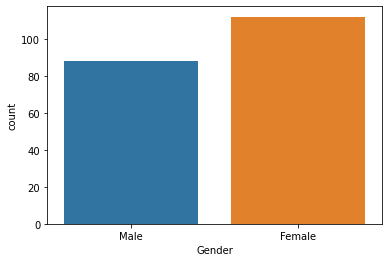

In [11]:
sns.countplot(customer['Gender'])

<AxesSubplot:xlabel='CustomerID', ylabel='Count'>

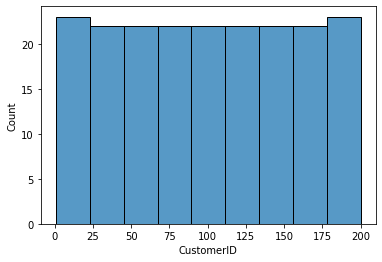

In [12]:
sns.histplot(customer["CustomerID"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

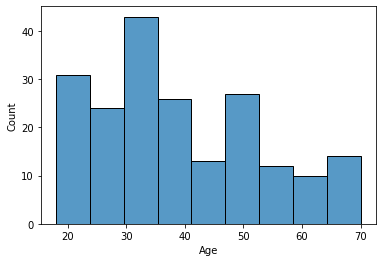

In [13]:
sns.histplot(customer['Age'])

<AxesSubplot:xlabel='Annual_Income', ylabel='Count'>

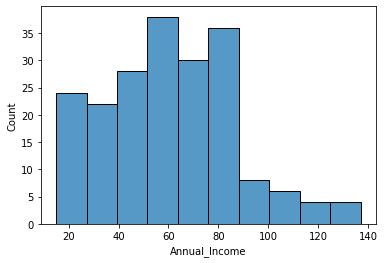

In [16]:
sns.histplot(customer['Annual_Income'])

<AxesSubplot:xlabel='Spending_Score', ylabel='Count'>

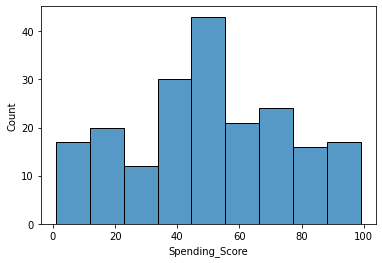

In [17]:
sns.histplot(customer['Spending_Score'])

# Finding and replacing outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

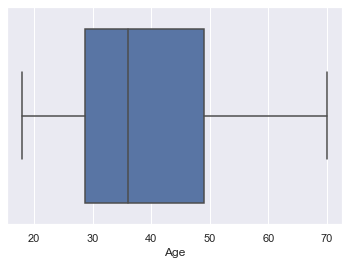

In [50]:
sns.boxplot(customer['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

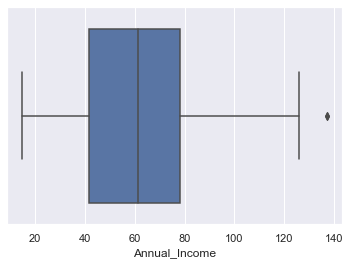

In [53]:
sns.boxplot(customer['Annual_Income'])

<AxesSubplot:xlabel='Annual_Income'>

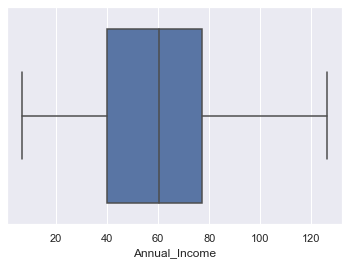

In [56]:
q1=customer.Annual_Income.quantile(0.25)
q3=customer.Annual_Income.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
customer['Annual_Income'] = np.where(customer['Annual_Income'] > upper_limit, 7, customer['Annual_Income'])
sns.boxplot(x=customer.AnnualIncome,showfliers = False)

Text(0.5, 1.0, 'The relationship between income and spending score')

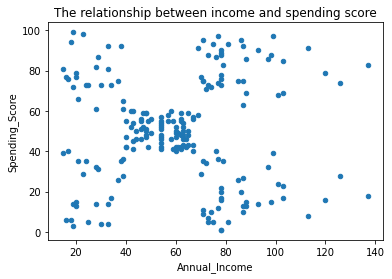

In [19]:
#scatter the income and spending score 
customer.plot(kind='scatter', x='Annual_Income', y='Spending_Score')
plt.title('The relationship between income and spending score')

Text(0.5, 1.0, 'The relationship between age and spending score')

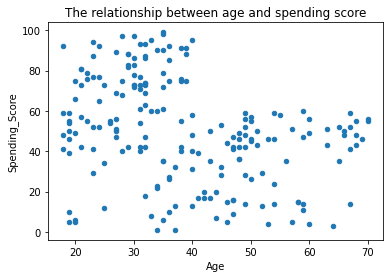

In [21]:
# scatter the age and spending score
customer.plot(kind='scatter', x='Age', y='Spending_Score')
plt.title('The relationship between age and spending score')

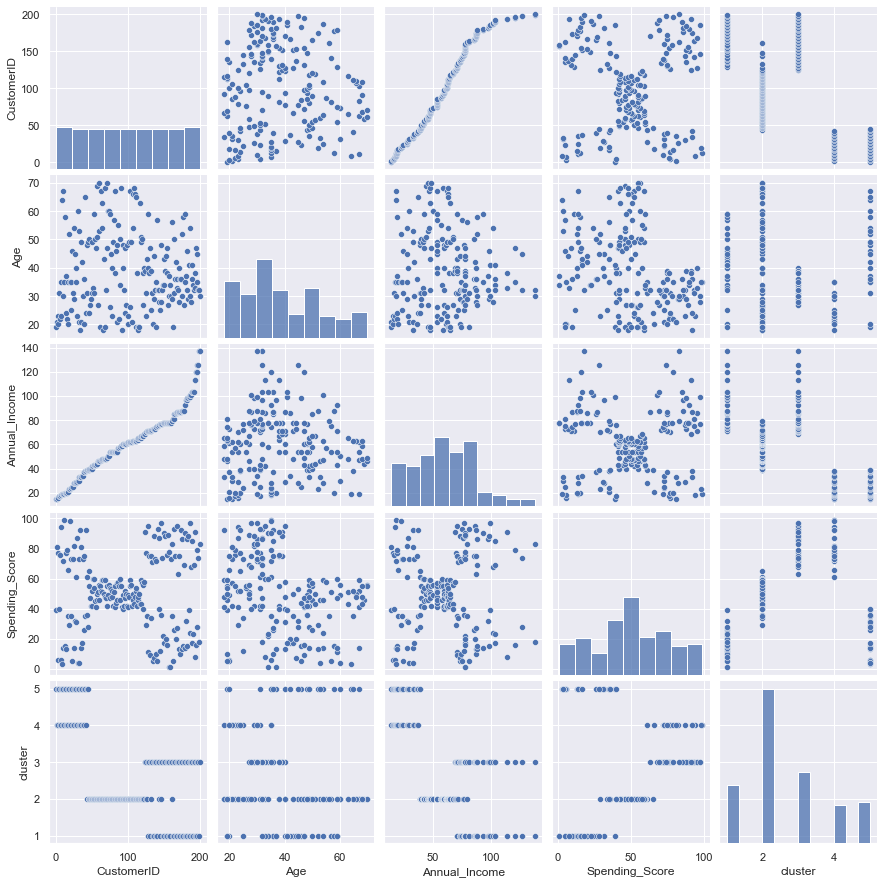

In [49]:
sns.pairplot(customer)

# Choosing the Annual Income and Spending score

In [24]:
X = customer.iloc[:,[3,4]].values

In [25]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters


WCSS-> Within Clusters Sum of Squares

In [26]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21850.165282585636,
 19672.07284901432]

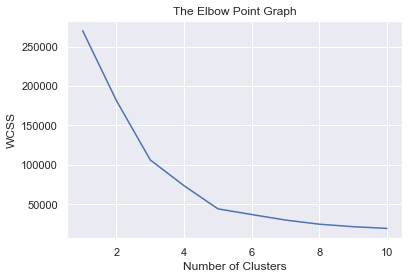

In [28]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
# using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_1, label, metric='euclidean')
    silhouette_scores.append(sil_coeff)
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')

plt.show()

NameError: name 'X_1' is not defined

Optimum Number Of Clusters=5

Training the k-Means Clustering Model

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters-0,1,2,3,4

Visualizing all the Clusters

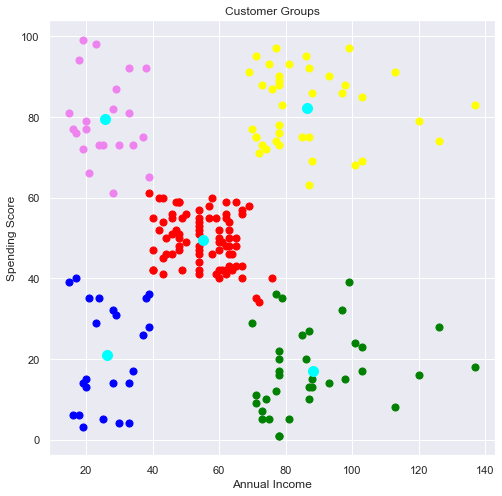

In [30]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Cluster 1: Average Income, Average Spending Score
Cluster 2: High Income, Low Spending Score
Cluster 3: Low Income, Low Spending Score
Cluster 4: Low Income, High Spending Score
Cluster 5: High Income, High Spending Score

In [69]:
oneData = customer.iloc[Y== 0, :]
twoData = customer.iloc[Y == 1, :]
threeData = customer.iloc[Y == 2, :]
fourData = customer.iloc[Y == 3, :]
fiveData = customer.iloc[Y== 4, :]

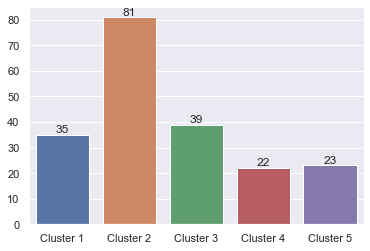

In [70]:
ax = sns.barplot(x = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                 y = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
ax.bar_label(container = ax.containers[0],labels = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
plt.show()

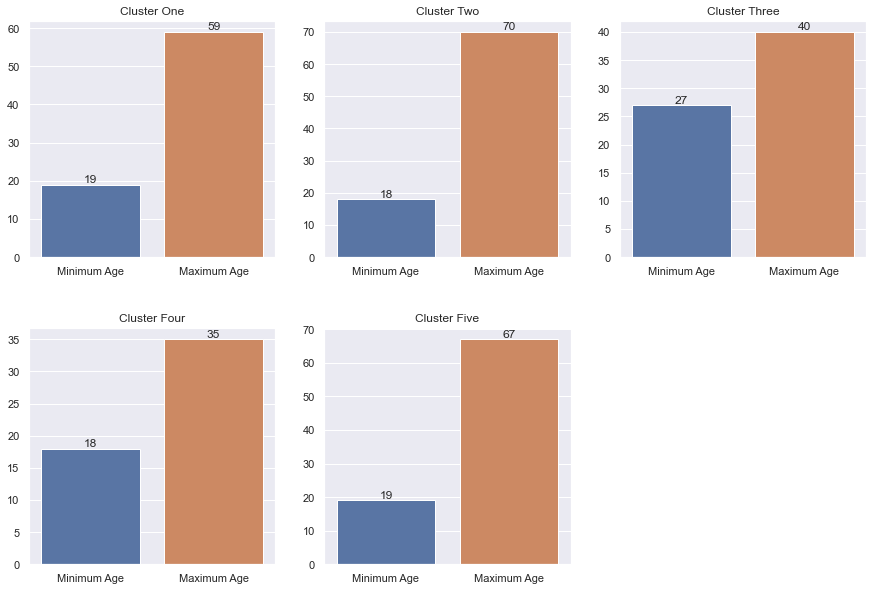

In [71]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [oneData['Age'].min(), oneData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [oneData['Age'].min(), oneData['Age'].max()])
plt.title('Cluster One')

plt.subplot(2,3,2)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [twoData['Age'].min(), twoData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [twoData['Age'].min(), twoData['Age'].max()])
plt.title('Cluster Two')

plt.subplot(2,3,3)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [threeData['Age'].min(), threeData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [threeData['Age'].min(), threeData['Age'].max()])
plt.title('Cluster Three')

plt.subplot(2,3,4)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [fourData['Age'].min(), fourData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [fourData['Age'].min(), fourData['Age'].max()])
plt.title('Cluster Four')

plt.subplot(2,3,5)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [fiveData['Age'].min(), fiveData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [fiveData['Age'].min(), fiveData['Age'].max()])
plt.title('Cluster Five')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

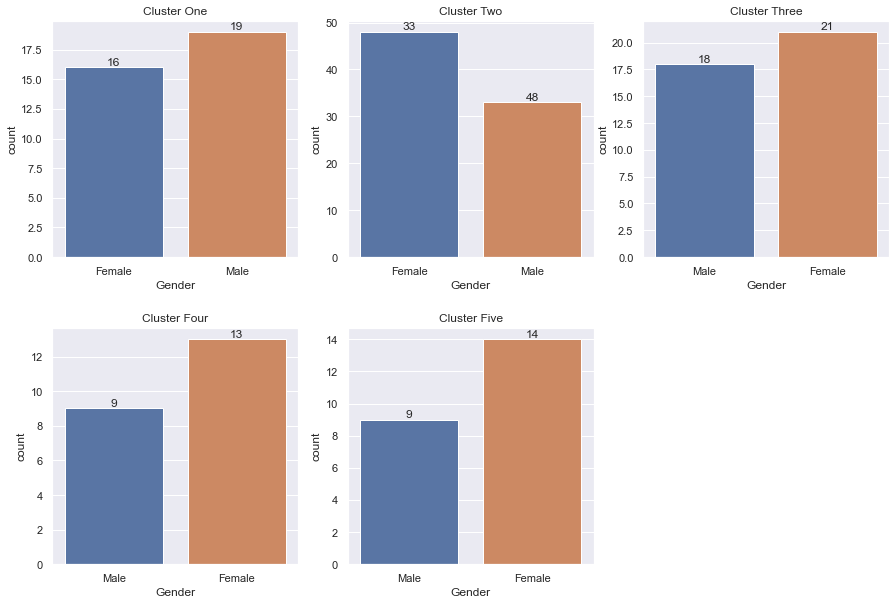

In [72]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.countplot(x = 'Gender', data = oneData)
ax.bar_label(container = ax.containers[0],labels = oneData['Gender'].value_counts(ascending = True))
plt.title('Cluster One')

plt.subplot(2,3,2)
ax = sns.countplot(x = 'Gender', data = twoData)
ax.bar_label(container = ax.containers[0],labels = twoData['Gender'].value_counts(ascending = True))
plt.title('Cluster Two')

plt.subplot(2,3,3)
ax = sns.countplot(x = 'Gender', data = threeData)
ax.bar_label(container = ax.containers[0],labels = threeData['Gender'].value_counts(ascending = True))
plt.title('Cluster Three')

plt.subplot(2,3,4)
ax = sns.countplot(x = 'Gender', data = fourData)
ax.bar_label(container = ax.containers[0],labels = fourData['Gender'].value_counts(ascending = True))
plt.title('Cluster Four')

plt.subplot(2,3,5)
ax = sns.countplot(x = 'Gender', data = fiveData)
ax.bar_label(container = ax.containers[0],labels = fiveData['Gender'].value_counts(ascending = True))
plt.title('Cluster Five')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()


Conclusion
Based on the analysis, these are the final observations from the dataset for each cluster:

Cluster 1 occupies the maximum amount of people that earn decent as well as spend a decent amount. They should be sent regular updates and promotional offers so as to keep their interest.
Cluster 2 has high income but they do not shop as much. These people should be targeted since they have the spending capactiy. Their past data should be analysed so as to send them specific promotional messages to get their interest back.
Cluster 3 should be ignored since they do not have the spending capacity nor do they show interest in spending.
Cluster 4 is a risky group since they do not have the spending capacity yet they have a high spending score. They should be sent more discount based coupons.
Cluster 5 is the best group since they have a high income and a high spending score as well. They should be sent regular updates and promotions.

# Hierarchical Clustering

In [31]:
customer.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [32]:
X = customer.iloc[:,[3,4]].values

In [33]:
customer.iloc[:,[2,3,4]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


# Dendogram

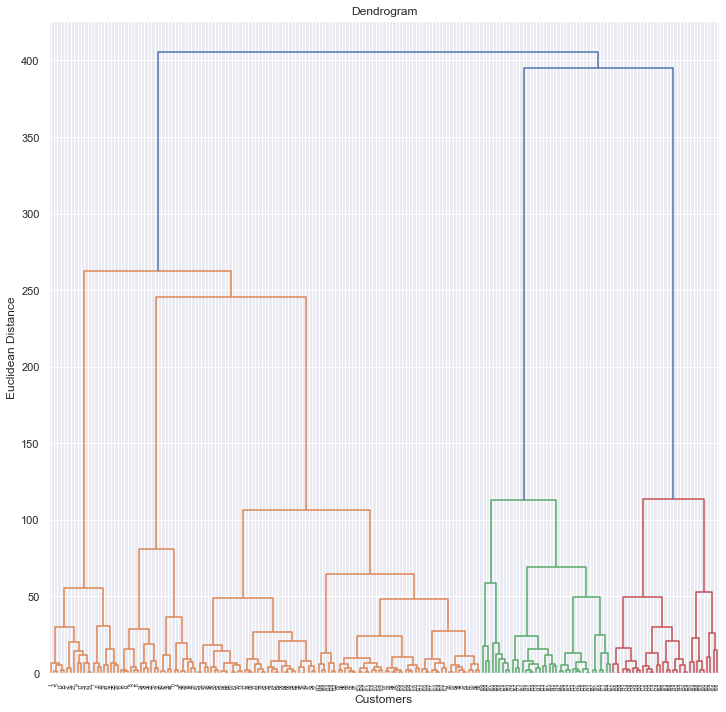

In [36]:
plt.figure(figsize= (12,12))
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

No of clusters = 5

In [39]:
clustering = AgglomerativeClustering(n_clusters=5, affinity= "euclidean", linkage= "ward")
predict = clustering.fit_predict(X)

In [40]:
customer["cluster"] = predict
customer["cluster"] = customer["cluster"]+1
customer.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

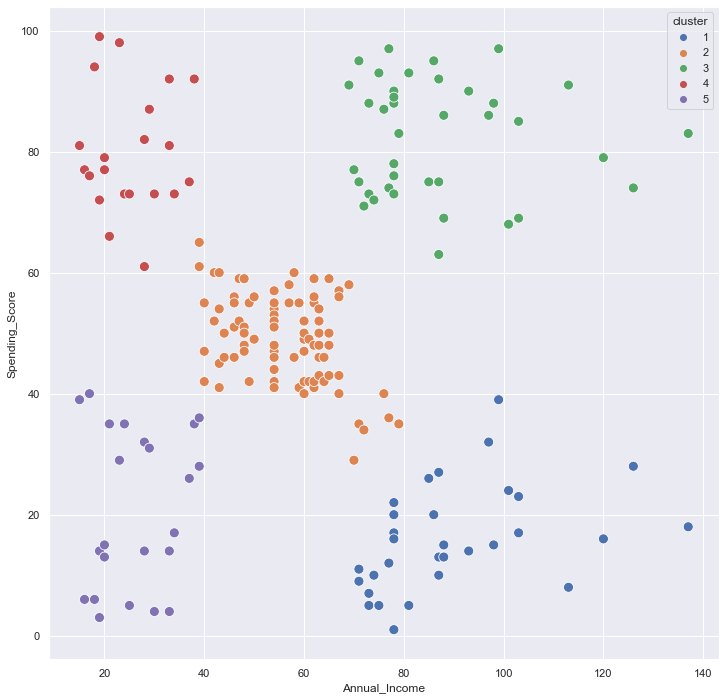

In [42]:
plt.figure(figsize = (12,12))
sns.scatterplot(data = customer, x = "Annual_Income", y = "Spending_Score", 
                hue = "cluster", palette= "deep", s = 100)

CLUSTER 1: Customers with high annual income and low spending score.

CLUSTER 2: Customers with average annual income and average spending score.

CLUSTER 3: Customers with high annual income and high spending score.

CLUSTER 4: Customers with low annual income and high spending score.

CLUSTER 5: Customers with low annual income and low spending score.